# 나랑 닮은 연예인을 찾아보자!

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#문제정의" data-toc-modified-id="문제정의-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>문제정의</a></span></li><li><span><a href="#데이터-준비" data-toc-modified-id="데이터-준비-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>데이터 준비</a></span></li></ul></div>

In [9]:
import numpy as np

## 문제정의

남자 연예인들의 사진을 모아서 나의 사진과 비교해보자.

## 데이터 준비

인터넷에서 남자 연예인들의 얼굴이 나온 사진을 크롤링했다.

[(313, 526, 634, 205)]


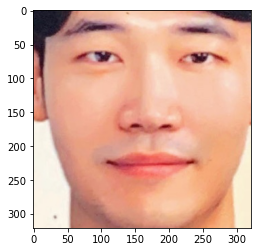

In [17]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/man/민기.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

공유 형님의 얼굴을 출력해봤다. 잘나온다. 잘생겼다. 가지고싶다.

얼굴을 가져오는 함수를 만들어 놓자

In [18]:
import face_recognition
import os

def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

폴더에 있는 파일들을 리스트로 가져와보자

In [19]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/man'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['박서준.jpg', '이정재.jpg', '공유.jpg', '강하늘.jpg', '이진욱.jpg', '오정태.jpg', '김우빈.png', '윤계상.jpg', '정우성.jpeg', '조정석.jpg', '최우식.jpg', '하정우.jpg', '신성록.jpg', '이제훈.jpg', '주원.jpg', '주지훈.jpg', '안보현.jpg', '안보현1.jpg', '이동욱.jpg', '민기.jpg', '유지태.jpg', '김선호.png', '유연석.jpg', '이준혁.jpg', '조승우.jpg']


In [21]:
image_file = os.path.join(dir_path, '민기.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding, len(embedding[0])

([array([-0.10924628,  0.11856651,  0.06617455, -0.05775369, -0.16668057,
         -0.08013923, -0.09819541, -0.12727064,  0.09272775, -0.07439797,
          0.2125448 , -0.0515595 , -0.15566906, -0.12723626, -0.0187383 ,
          0.18389811, -0.1849582 , -0.13282746, -0.02274682,  0.00056292,
          0.06885186,  0.00809064,  0.08052202,  0.02751385, -0.12275798,
         -0.35634181, -0.08837319, -0.07650718,  0.0200554 , -0.03800538,
         -0.08867332,  0.06936388, -0.1734603 , -0.10118883,  0.04341294,
          0.11437345, -0.04068092, -0.05660969,  0.12680803, -0.06133719,
         -0.24284057,  0.05512914,  0.04770752,  0.25662953,  0.2337551 ,
          0.01983342,  0.05303936, -0.10622887,  0.13834733, -0.14243317,
          0.05242902,  0.14114742,  0.103953  ,  0.03093817,  0.03201331,
         -0.08546004,  0.06083732,  0.12583359, -0.10598453,  0.00516053,
          0.11726337, -0.05651022,  0.02520152, -0.08521517,  0.21575078,
          0.03559722, -0.09385535, -0.

In [22]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

In [23]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['공유']

array([-0.0406131 ,  0.12369743, -0.00282734,  0.0466991 , -0.05646835,
        0.03627442, -0.03206644, -0.11635858,  0.18212917, -0.12508638,
        0.30423135, -0.05393469, -0.20468882, -0.08667129, -0.09415744,
        0.12666029, -0.19323501, -0.14616963, -0.03241239, -0.01459446,
        0.15198913,  0.04209089, -0.00219355, -0.00633387, -0.13678446,
       -0.28810835, -0.090708  , -0.10936744,  0.02184817, -0.06402059,
        0.00050567,  0.05122843, -0.14762595, -0.01386353,  0.01944035,
        0.0483951 , -0.04675824, -0.05059776,  0.22425607, -0.0333448 ,
       -0.22126025,  0.06129708,  0.03834854,  0.27327165,  0.16342558,
        0.03305275, -0.04198927, -0.15281478,  0.12313808, -0.16858508,
        0.0727522 ,  0.21688715,  0.16858417,  0.09824842,  0.05479806,
       -0.14917102,  0.01873901,  0.08050463, -0.0458011 , -0.03285438,
        0.05385482, -0.01791102,  0.08847   , -0.06507091,  0.18045135,
        0.04100225, -0.08633608, -0.13025041,  0.08987665, -0.13

In [24]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('공유', '이진욱')

0.6342287126464922

In [25]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('공유')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [26]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('공유',
  array([-0.0406131 ,  0.12369743, -0.00282734,  0.0466991 , -0.05646835,
          0.03627442, -0.03206644, -0.11635858,  0.18212917, -0.12508638,
          0.30423135, -0.05393469, -0.20468882, -0.08667129, -0.09415744,
          0.12666029, -0.19323501, -0.14616963, -0.03241239, -0.01459446,
          0.15198913,  0.04209089, -0.00219355, -0.00633387, -0.13678446,
         -0.28810835, -0.090708  , -0.10936744,  0.02184817, -0.06402059,
          0.00050567,  0.05122843, -0.14762595, -0.01386353,  0.01944035,
          0.0483951 , -0.04675824, -0.05059776,  0.22425607, -0.0333448 ,
         -0.22126025,  0.06129708,  0.03834854,  0.27327165,  0.16342558,
          0.03305275, -0.04198927, -0.15281478,  0.12313808, -0.16858508,
          0.0727522 ,  0.21688715,  0.16858417,  0.09824842,  0.05479806,
         -0.14917102,  0.01873901,  0.08050463, -0.0458011 , -0.03285438,
          0.05385482, -0.01791102,  0.08847   , -0.06507091,  0.18045135,
          0.04100225, -0.08633

In [27]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [28]:
# obama와 가장 닮은 사람은 누굴까요?
get_nearest_face('민기')

순위 1 : 이름(유지태), 거리(0.4200176008146891)
순위 2 : 이름(윤계상), 거리(0.42564997374370594)
순위 3 : 이름(유연석), 거리(0.44557889458601957)
순위 4 : 이름(이정재), 거리(0.4533669671191787)
순위 5 : 이름(이제훈), 거리(0.4682425133326994)
